In [84]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

In [85]:
univ = pd.read_csv("C:/Users/zarar/Downloads/archive/qs-world-university-rankings-2017-to-2022-V2.csv")

In [86]:
univ.head()

,university,year,rank_display,score,link,country,city,region,logo,type,research_output,student_faculty_ratio,international_students,size,faculty_count
0,Massachusetts Institute of Technology (MIT),2017,1,100.0,https://www.topuniversities.com/universities/m...,United States,Cambridge,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,4.0,"3,730",M,"3,065"
1,Stanford University,2017,2,98.7,https://www.topuniversities.com/universities/s...,United States,Stanford,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,3.0,"3,879",L,"4,725"
2,Harvard University,2017,3,98.3,https://www.topuniversities.com/universities/h...,United States,Cambridge,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,5.0,"5,877",L,"4,646"
3,University of Cambridge,2017,4,97.2,https://www.topuniversities.com/universities/u...,United Kingdom,Cambridge,Europe,https://www.topuniversities.com/sites/default/...,Public,Very high,4.0,"7,925",L,"5,800"
4,California Institute of Technology (Caltech),2017,5,96.9,https://www.topuniversities.com/universities/c...,United States,Pasadena,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,2.0,692,S,968


In [87]:
univ.describe()

,year,score,student_faculty_ratio
count,6482.000000,2820.000000,6407.000000
mean,2019.693613,46.595532,13.264554
std,1.716683,18.813110,6.604294
min,2017.000000,23.500000,1.000000
25%,2018.000000,31.800000,9.000000
50%,2020.000000,40.600000,12.000000
75%,2021.000000,58.025000,17.000000
max,2022.000000,100.000000,67.000000


In [88]:
univ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6482 entries, 0 to 6481
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   university              6482 non-null   object 
 1   year                    6482 non-null   int64  
 2   rank_display            6414 non-null   object 
 3   score                   2820 non-null   float64
 4   link                    6482 non-null   object 
 5   country                 6482 non-null   object 
 6   city                    6304 non-null   object 
 7   region                  6482 non-null   object 
 8   logo                    6482 non-null   object 
 9   type                    6470 non-null   object 
 10  research_output         6480 non-null   object 
 11  student_faculty_ratio   6407 non-null   float64
 12  international_students  6318 non-null   object 
 13  size                    6480 non-null   object 
 14  faculty_count           6404 non-null   

In [89]:
#print the first ten rows where the score column is null
null_score_rows = univ[univ['score'].isnull()]

# Step 3: Select specific columns to print
# Replace 'column1', 'column2', ... with the actual column names you want to print
selected_columns = null_score_rows[['university', 'rank_display', 'score']]

# Step 4: Print the first ten rows of the selected columns
selected_columns.head(10)

,university,rank_display,score
375,Université Paris Descartes,377,NaN
400,Bandung Institute of Technology (ITB),401-410,NaN
401,Brandeis University,401-410,NaN
402,Illinois Institute of Technology,401-410,NaN
403,Johannes Gutenberg Universität Mainz,401-410,NaN
405,National Research Nuclear University MEPhI (Mo...,401-410,NaN
406,Taipei Medical University (TMU),401-410,NaN
407,Universidad Externado de Colombia,401-410,NaN
408,Wake Forest University,401-410,NaN
409,Aix-Marseille University,411-420,NaN


As we can see from the above output, most of the null values in score has a rank below 400

In [90]:
univ_ref = univ.dropna(subset=['score']) #dropping the data points where score is null

In [91]:
univ_ref['score'].isnull().sum() #sanity check

0

In [92]:
univ_ref.shape

(2820, 15)

In [93]:
univ_ref['research_output'].value_counts() , univ_ref['size'].value_counts() #there are two variants of 'Very high'

(research_output
 Very High    2570
 High          201
 Medium         26
 Very high      20
 Low             3
 Name: count, dtype: int64,
 size
 L     1361
 XL     786
 M      520
 S      153
 Name: count, dtype: int64)

In [94]:
univ_ref['research_level'] = np.where(univ_ref['research_output'] == 'Very high', 'Very High',univ_ref['research_output']) #Merging the two variants

C:\Users\zarar\AppData\Local\Temp\ipykernel_6644\1580367200.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  univ_ref['research_level'] = np.where(univ_ref['research_output'] == 'Very high', 'Very High',univ_ref['research_output']) #Merging the two variants


In [95]:
univ_ref['research_level'].value_counts() , univ_ref['size'].value_counts() #sanity check

(research_level
 Very High    2590
 High          201
 Medium         26
 Low             3
 Name: count, dtype: int64,
 size
 L     1361
 XL     786
 M      520
 S      153
 Name: count, dtype: int64)

In [96]:
univ_ref['faculty_count'].isnull().sum() #total rows where faculty count is null

28

In [97]:
univ_ref['faculty_count'] = univ_ref['faculty_count'].str.replace(',', '') #removing ',' before converting the column type to float

C:\Users\zarar\AppData\Local\Temp\ipykernel_6644\3208828472.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  univ_ref['faculty_count'] = univ_ref['faculty_count'].str.replace(',', '') #removing ',' before converting the column type to float


In [98]:
univ_ref['faculty_count'] = univ_ref['faculty_count'].astype(float)

C:\Users\zarar\AppData\Local\Temp\ipykernel_6644\1218057993.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  univ_ref['faculty_count'] = univ_ref['faculty_count'].astype(float)


In [99]:
univ_ref['international_students'] = univ_ref['international_students'].str.replace(',', '') #removing ',' before converting the column type to float

C:\Users\zarar\AppData\Local\Temp\ipykernel_6644\724056063.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  univ_ref['international_students'] = univ_ref['international_students'].str.replace(',', '') #removing ',' before converting the column type to float


In [100]:
univ_ref['international_students'] = univ_ref['international_students'].astype(float)

C:\Users\zarar\AppData\Local\Temp\ipykernel_6644\2693779075.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  univ_ref['international_students'] = univ_ref['international_students'].astype(float)


In [101]:
univ_ref.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2820 entries, 0 to 5682
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   university              2820 non-null   object 
 1   year                    2820 non-null   int64  
 2   rank_display            2808 non-null   object 
 3   score                   2820 non-null   float64
 4   link                    2820 non-null   object 
 5   country                 2820 non-null   object 
 6   city                    2757 non-null   object 
 7   region                  2820 non-null   object 
 8   logo                    2820 non-null   object 
 9   type                    2820 non-null   object 
 10  research_output         2820 non-null   object 
 11  student_faculty_ratio   2795 non-null   float64
 12  international_students  2792 non-null   float64
 13  size                    2820 non-null   object 
 14  faculty_count           2792 non-null   float

In [102]:
univ_ref['score_bin'] = pd.qcut(univ_ref['score'], q = 10) #binning the score column into 10 bins

C:\Users\zarar\AppData\Local\Temp\ipykernel_6644\765175933.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  univ_ref['score_bin'] = pd.qcut(univ_ref['score'], q = 10) #binning the score column into 10 bins


In [103]:
univ_ref['num_country'] = pd.Categorical(univ_ref['country']).codes

C:\Users\zarar\AppData\Local\Temp\ipykernel_6644\4147588862.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  univ_ref['num_country'] = pd.Categorical(univ_ref['country']).codes


In [104]:
scale_mapper = {"S":1, "M":2, "L":3, "XL":4} #Ordinal Encoding
univ_ref["ord_size"] = univ_ref["size"].replace(scale_mapper)

C:\Users\zarar\AppData\Local\Temp\ipykernel_6644\159139825.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  univ_ref["ord_size"] = univ_ref["size"].replace(scale_mapper)
C:\Users\zarar\AppData\Local\Temp\ipykernel_6644\159139825.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  univ_ref["ord_size"] = univ_ref["size"].replace(scale_mapper)


In [105]:
research_mapper = {"Low":1, "Medium":2, "High":3, "Very High":4}
univ_ref["research_num"] = univ_ref["research_level"].replace(research_mapper)

C:\Users\zarar\AppData\Local\Temp\ipykernel_6644\2877672396.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  univ_ref["research_num"] = univ_ref["research_level"].replace(research_mapper)
C:\Users\zarar\AppData\Local\Temp\ipykernel_6644\2877672396.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  univ_ref["research_num"] = univ_ref["research_level"].replace(research_mapper)


In [106]:
univ_ref['research_num'].value_counts() , univ_ref['ord_size'].value_counts() #Sanity check

(research_num
 4    2590
 3     201
 2      26
 1       3
 Name: count, dtype: int64,
 ord_size
 3    1361
 4     786
 2     520
 1     153
 Name: count, dtype: int64)

In [107]:
univ_ref.isnull().sum()

university                 0
year                       0
rank_display              12
score                      0
link                       0
country                    0
city                      63
region                     0
logo                       0
type                       0
research_output            0
student_faculty_ratio     25
international_students    28
size                       0
faculty_count             28
research_level             0
score_bin                  0
num_country                0
ord_size                   0
research_num               0
dtype: int64

In [108]:
mean_student_faculty_ratio = univ_ref['student_faculty_ratio'].mean()
univ_ref['student_faculty_ratio'].fillna(value=mean_student_faculty_ratio, inplace = True)#Replacing the null values with the column's mean

C:\Users\zarar\AppData\Local\Temp\ipykernel_6644\2703460133.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  univ_ref['student_faculty_ratio'].fillna(value=mean_student_faculty_ratio, inplace = True)#Replacing the null values with the column's mean
C:\Users\zarar\AppData\Local\Temp\ipykernel_6644\2703460133.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vi

In [109]:
mean_faculty_count = univ_ref['faculty_count'].mean()
univ_ref['faculty_count'].fillna(value=mean_faculty_count, inplace = True)

C:\Users\zarar\AppData\Local\Temp\ipykernel_6644\1483519525.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  univ_ref['faculty_count'].fillna(value=mean_faculty_count, inplace = True)
C:\Users\zarar\AppData\Local\Temp\ipykernel_6644\1483519525.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  univ_ref['faculty_count'].fillna(value=mean_fa

In [110]:
mean_international_student = univ_ref['international_students'].mean()
univ_ref['international_students'].fillna(value=mean_international_student, inplace = True)#Replacing the null values with the column's mean

C:\Users\zarar\AppData\Local\Temp\ipykernel_6644\2217213627.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  univ_ref['international_students'].fillna(value=mean_international_student, inplace = True)#Replacing the null values with the column's mean
C:\Users\zarar\AppData\Local\Temp\ipykernel_6644\2217213627.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

In [111]:
univ_ref.isnull().sum()

university                 0
year                       0
rank_display              12
score                      0
link                       0
country                    0
city                      63
region                     0
logo                       0
type                       0
research_output            0
student_faculty_ratio      0
international_students     0
size                       0
faculty_count              0
research_level             0
score_bin                  0
num_country                0
ord_size                   0
research_num               0
dtype: int64

In [112]:
X_cols = ['num_country', 'research_num', 'student_faculty_ratio', 'international_students', 'ord_size', 'faculty_count']
X = univ_ref[X_cols].to_numpy()
X

array([[6.0000e+01, 4.0000e+00, 4.0000e+00, 3.7300e+03, 2.0000e+00,
        3.0650e+03],
       [6.0000e+01, 4.0000e+00, 3.0000e+00, 3.8790e+03, 3.0000e+00,
        4.7250e+03],
       [6.0000e+01, 4.0000e+00, 5.0000e+00, 5.8770e+03, 3.0000e+00,
        4.6460e+03],
       ...,
       [5.0000e+01, 4.0000e+00, 9.0000e+00, 1.4290e+00, 2.0000e+00,
        1.0170e+00],
       [2.8000e+01, 4.0000e+00, 1.7000e+01, 3.5050e+00, 3.0000e+00,
        1.4460e+00],
       [7.0000e+00, 4.0000e+00, 2.9000e+01, 1.2285e+01, 4.0000e+00,
        1.5080e+00]])

In [113]:
y = univ_ref['score'].to_numpy()
y

array([100. ,  98.7,  98.3, ...,  24.1,  24.1,  24.1])

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [115]:
X_train.shape , y_train.shape , X_test.shape , y_test.shape

((2256, 6), (2256,), (564, 6), (564,))

In [116]:
X_train

array([[1.0000e+00, 4.0000e+00, 1.5000e+01, 3.1049e+04, 4.0000e+00,
        3.8520e+03],
       [5.5000e+01, 4.0000e+00, 7.0000e+00, 1.4150e+03, 3.0000e+00,
        3.8500e+03],
       [9.0000e+00, 4.0000e+00, 5.0000e+00, 8.8000e+01, 2.0000e+00,
        9.8100e+02],
       ...,
       [5.2000e+01, 4.0000e+00, 8.0000e+00, 5.6520e+03, 3.0000e+00,
        2.6800e+03],
       [1.8000e+01, 4.0000e+00, 5.0000e+00, 7.6490e+03, 4.0000e+00,
        8.0100e+03],
       [1.9000e+01, 4.0000e+00, 8.0000e+00, 3.8750e+03, 4.0000e+00,
        3.7170e+03]])

In [117]:
regressor = RandomForestRegressor(n_estimators=40, random_state=0)

In [118]:
regressor.fit(X_train, y_train) #training a Random Forest Regressor to predict the score

RandomForestRegressor(n_estimators=40, random_state=0)

In [119]:
regressor.score(X_train, y_train)

0.9821226806833554

In [120]:
predictions = regressor.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

print("Accuracy:", regressor.score(X_test, y_test))

Mean Squared Error: 11.926563451876783
Accuracy: 0.9650652734652959


In [121]:
importances = regressor.feature_importances_ #Obtaining the feature importance for each features

# Print the feature importances
print(importances)
print(X_cols)

[0.06267519 0.01391515 0.14344907 0.57062854 0.02436995 0.1849621 ]
['num_country', 'research_num', 'student_faculty_ratio', 'international_students', 'ord_size', 'faculty_count']


In [122]:
X_axis = ['Country', 'Research Output', 'Student Faculty Ratio', 'International Students', 'University Size', 'Faculty Count']
feature_imp = np.stack((X_axis, importances * 100), axis=1)

In [123]:
feature_imp

array([['Country', '6.267519468380757'],
       ['Research Output', '1.3915145854791682'],
       ['Student Faculty Ratio', '14.344906784735151'],
       ['International Students', '57.0628539235033'],
       ['University Size', '2.4369949751580924'],
       ['Faculty Count', '18.496210262743528']], dtype='<U32')

In [124]:
feature_imp_df = pd.DataFrame(data = feature_imp, columns = ['Features', 'Importance'])
feature_imp_df['Importance'] = feature_imp_df['Importance'].astype(float)
feature_imp_df = feature_imp_df.sort_values(by='Importance', ascending = False)

In [125]:
feature_imp_df.head()

,Features,Importance
3,International Students,57.062854
5,Faculty Count,18.496210
2,Student Faculty Ratio,14.344907
0,Country,6.267519
4,University Size,2.436995


In [126]:
feature_imp_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, 3 to 1
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Features    6 non-null      object 
 1   Importance  6 non-null      float64
dtypes: float64(1), object(1)
memory usage: 144.0+ bytes


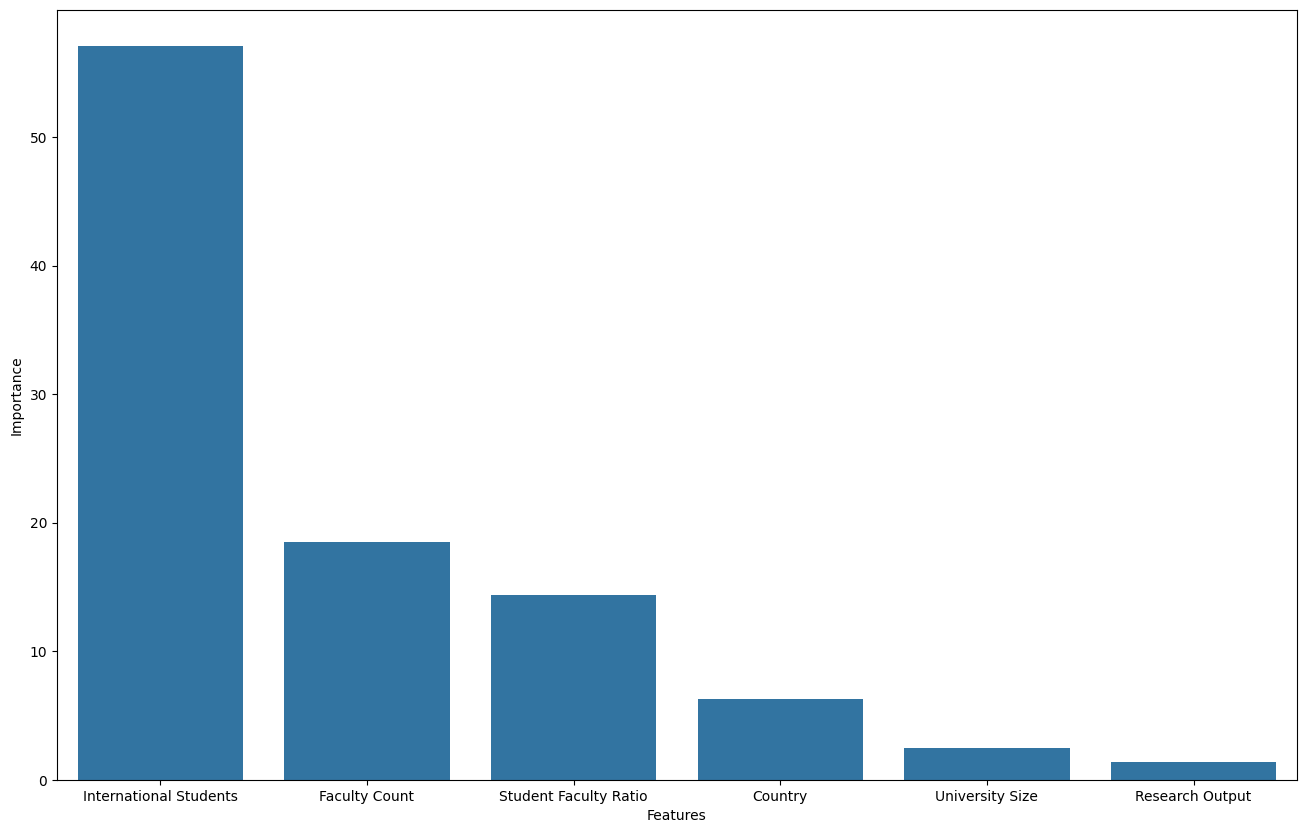

In [127]:
fig, ax = plt.subplots(figsize=(16, 10))
barplot = sns.barplot(feature_imp_df, x = "Features", y = "Importance", ax = ax)

As we can see, the number of international students is the strongest factor in deciding the score(rank) of a university

In [128]:
figure = barplot.get_figure()
figure.savefig("feautre_importance.png") 